<img src="plexo-logo.png" alt="Drawing" style="width: 250px;"/>

# Plexo Capital Portfolio Construction

---


## Industry Analysis

---


In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
import powerlaw
import bqplot
from bqplot import pyplot as blt
import ipywidgets as widgets
import warnings
plt.style.use('seaborn-darkgrid')
warnings.filterwarnings("ignore")

We are big proponents of power law distribution in venture capital - very well demonstarted in this blog on [Power Laws in Venture](http://reactionwheel.net/2015/06/power-laws-in-venture.html).

Below see a discrete analysis for the different sectors and their returns distribution (legacy values).

Select industry verticals for histogram of returns distribution.


In [2]:
#Data Research

### Alibek's data for discrete analysis

disc = pd.read_csv('discreteDist.csv', index_col = 0).T
mult = pd.read_csv('multiples.csv', index_col = 0).T

sectors = list(mult.columns)


In [3]:
def plot_func(secs):
    df = disc[list(secs)]
    df.plot(kind = 'bar')
    plt.xlabel("Return Multiples")
    plt.ylabel("Percentage of Companies")
    plt.show()
    

widg1 = widgets.interactive(plot_func, secs=widgets.SelectMultiple(
    options=sectors,
    value=[sectors[3],sectors[-1]],
    description='Verticals',
    disabled=False
    ))

display(widg1)

interactive(children=(SelectMultiple(description='Verticals', index=(3, 17), options=('Ad/Marketing tech', 'AI…

In [4]:
#Exact Multiples (Capped at 50x) :

In [5]:
def mutiples(secs):
    display(mult[list(secs)])
    
widg2 = widgets.interactive(mutiples, secs=widgets.SelectMultiple(
    options=sectors,
    value=[sectors[3],sectors[-1]],
    description='Verticals',
    disabled=False
    ))

#display(widg2)

In [6]:
#grid = widgets.GridspecLayout(1,2, height='400px')
#grid[:,0] = widg1
#grid[:,1] = widg2
#display(grid)

In [7]:
#Moments for discrete distribution :

In [8]:
mu = np.sum(np.multiply(mult,disc))
mom2 = np.sum(np.multiply(mult**2,disc))
var = mom2-mu**2
stdDev = np.sqrt(var)

moments = pd.DataFrame([mu,var,stdDev]).T
moments = moments.rename_axis('Sectors')
moments = moments.rename(columns= {0:'Mean',1:'Variance',2:'Standard Error'})

#display(moments)

---

## Underlying Buckets for Plexo Capital

- Target Fund Size = USD 100 MM
- Fund Management Fees = 1.5%
- Effective Fund Size = USD 91 MM


### Primary Buckets

Cash flow for primary investments is distributed on the later half of fund lifecycle. Invesment period is distributed quarterly till year 5 and payout is modelled quarterly from year 6-12.

### Beta GPs

- Fund Size -> < 15 MM
- Vintage Years -> 2009 - 2020
- Commitments -> USD 500 K
- Carry -> 10%

The expectation is calculated based on these results from Pitchbook - [Source](https://my.pitchbook.com/?pcc=361641-88).

See Angelist performance benchmark here - [Angellist](https://angel.co/v/venture/calculator).

TVPI and IRR Histogram Distribution below -

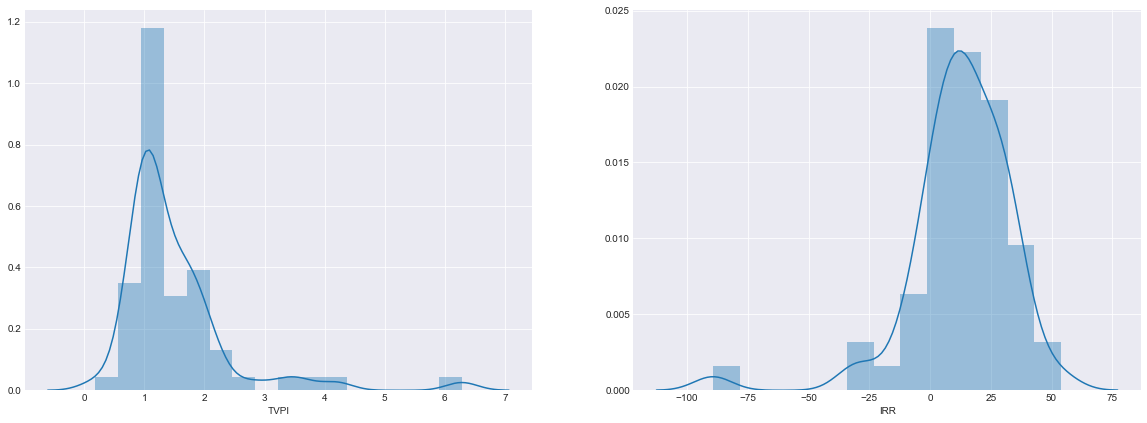

In [9]:
betaGPs = pd.read_excel('Beta_GPs.xlsx',skiprows=7,skipfooter = 3, index_col = 1)
betaTvpi = betaGPs['TVPI']*betaGPs['Fund Size']
betaIrr = betaGPs['IRR']*betaGPs['Fund Size']
f, axes = plt.subplots(1,2, figsize=(20, 7))
sns.distplot(betaGPs['TVPI'], ax =  axes[0])
sns.distplot(betaGPs['IRR'], ax =  axes[1])
plt.show()

### Mean is calculated with the fund size as weights (Very similar to normal mean but more accurate)
betaGPmean = sum(betaTvpi.dropna())/sum(betaGPs[betaGPs['TVPI'].notna()]['Fund Size'])

### Downside risk is calculated as 
downside = betaGPs[betaGPs['TVPI']<betaGPmean]
betaDR = (downside['TVPI']-betaGPmean)*(downside['TVPI']-betaGPmean)*downside['Fund Size']
betaGPDR = sum(betaDR)/sum(downside['Fund Size'])
betaGPIRR = sum(betaIrr.dropna())/sum(betaGPs[betaGPs['IRR'].notna()]['Fund Size'])

### Core GPs

- Fund Size -> 15 MM - 100 MM
- Vintage Years -> 2009 - 2020
- Commitments -> USD 1 MM - 5 MM
- Carry -> 10%

The expectation is calculated based on these results from Pitchbook - [Source](https://my.pitchbook.com/?pcc=361665-01).

See Angelist performance benchmark here - [Angellist](https://angel.co/v/venture/calculator).

TVPI and IRR Histogram Distribution below -

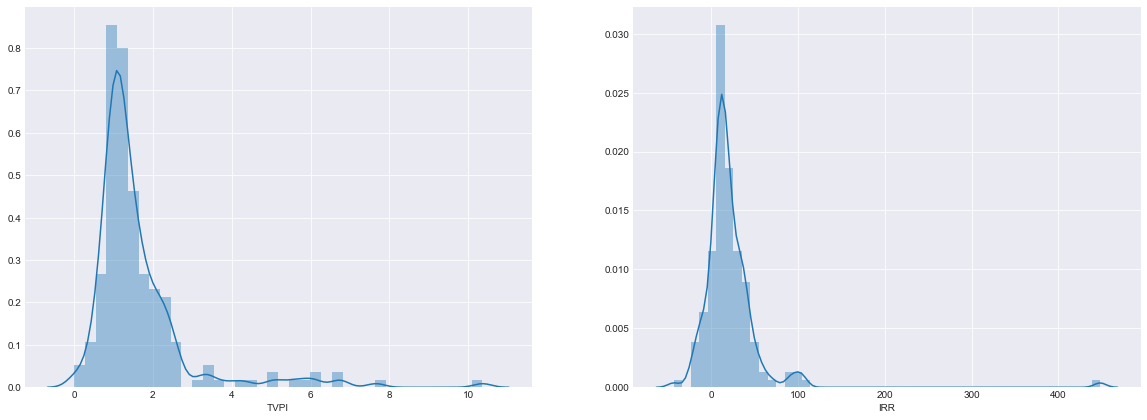

In [10]:
coreGPs = pd.read_excel('Core_GPs.xlsx',skiprows=7,skipfooter = 3, index_col = 1)
coreTvpi = coreGPs['TVPI']*coreGPs['Fund Size']
coreIrr = coreGPs['IRR']*coreGPs['Fund Size']
f, axes = plt.subplots(1,2, figsize=(20,7))
sns.distplot(coreGPs['TVPI'], ax =  axes[0])
sns.distplot(coreGPs['IRR'], ax =  axes[1])
plt.show()

coreGPmean = sum(coreTvpi.dropna())/sum(coreGPs[coreGPs['TVPI'].notna()]['Fund Size'])
downside = coreGPs[coreGPs['TVPI']<1]
coreDR = (downside['TVPI']-1)*(downside['TVPI']-1)*downside['Fund Size']
coreGPDR = sum(coreDR)/sum(downside['Fund Size'])
coreGPIRR = sum(coreIrr.dropna())/sum(coreGPs[coreGPs['IRR'].notna()]['Fund Size'])

### Senior GPs

- Fund Size -> 100 MM - 250 MM
- Vintage Years -> 2009 - 2020
- Commitments -> USD 3 MM - 5 MM
- Carry -> 10%

The expectation is calculated based on these results from Pitchbook - [Source](https://my.pitchbook.com/?pcc=361667-44).

See Angelist performance benchmark here - [Angellist](https://angel.co/v/venture/calculator).

TVPI and IRR Histogram Distribution below -

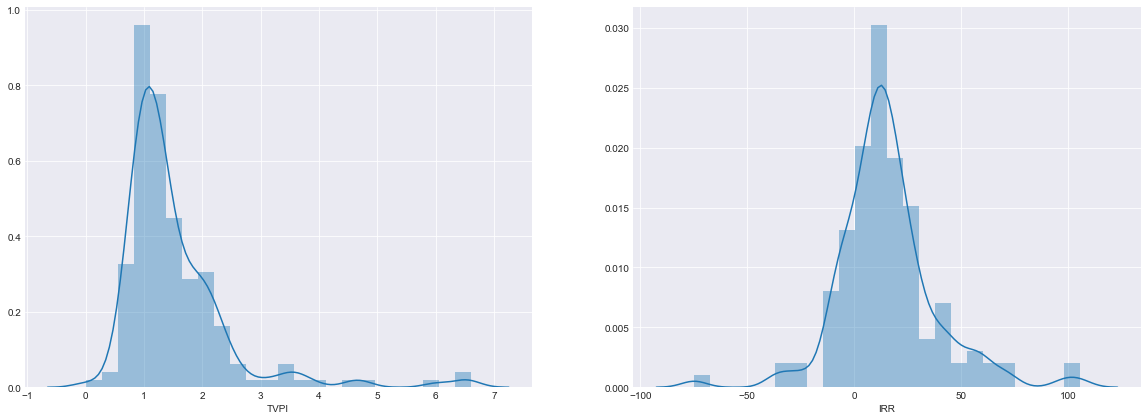

In [11]:
senGPs = pd.read_excel('Senior_GPs.xlsx',skiprows=7,skipfooter = 3, index_col = 1)
senTvpi = senGPs['TVPI']*senGPs['Fund Size']
senIrr = senGPs['IRR']*senGPs['Fund Size']
f, axes = plt.subplots(1,2, figsize=(20,7))
sns.distplot(senGPs['TVPI'], ax =  axes[0])
sns.distplot(senGPs['IRR'], ax =  axes[1])
plt.show()

senGPmean = sum(senTvpi.dropna())/sum(senGPs[senGPs['TVPI'].notna()]['Fund Size'])
downside = senGPs[senGPs['TVPI']<senGPmean]
senDR = (downside['TVPI']-senGPmean)*(downside['TVPI']-senGPmean)*downside['Fund Size']
senGPDR = sum(senDR)/sum(downside['Fund Size'])
senGPIRR = sum(senIrr.dropna())/sum(senGPs[senGPs['IRR'].notna()]['Fund Size'])

### Direct Investments

- Broad Verticals -> Enterprise, Marketplace + Tech enabled consumer
- Commitments -> USD 500 K - 2 MM
- Carry -> 20%

Unlike the return multiples in the starting, the analysis below has been done using a continuous analysis of power law distribution. You can read more about the distribution here - [Pareto Distribution](https://en.wikipedia.org/wiki/Pareto_distribution)

We would define the probability distribution of return multiples in the following way :

$$ \begin{equation}
    p(x) = \begin{cases}
    \frac{\alpha-1}{\alpha}, & \text{for $x<1$}\\
    \frac{(\alpha - 1)}{\alpha} x^{-\alpha}, & \text{for $x>=1$}
    \end{cases} \end{equation} $$
    
The above distribution is built on basic probability and continuity rules ([pdf](https://en.wikipedia.org/wiki/Probability_density_function) should sum to 1). Also the power law has been used on only the winning investments (x>1) as indicated in many research papers (some referrenced below).
    
Based on empirical evidence, we have found $\alpha$ to be between 1.9-2.5. We will calibrate this $\alpha$ for each vertical based on data we have. For the analysis below and for stability we are choosing TVPI $\alpha = 2.42$. 

This number comes from the angellist data and research paper (page 8) - [Source](https://angel.co/pdf/growth.pdf), based on the log likelihood maximization method derived originally from the works of [Clauset et al (2009)](https://arxiv.org/pdf/0706.1062.pdf).

One assumption is that the probability of firms between 0 and 1x returns are considered constant but given the alpha this is a conservative approach for our analysis.

The return multiple probability distribution function looks like this -

In [12]:
def pdf(x, alpha = 2.42):
    if x<=1:
        return (alpha-1)/(alpha)
    res = (alpha-1)*np.power(x,-alpha)/alpha
    return res

alpha = 2.42
x = np.linspace(0,10,1000)
y = [pdf(i,alpha) for i in x]
blt.plot(x,y)
blt.title('Continuos probability distribution for return multiples')
blt.xlabel('Return Multiples')
blt.ylabel('Probabaility')
blt.show()

### Mean is calculated based on normal distribution behaviour
directmean = (alpha-1)/(alpha*(alpha-2))+(alpha-1)/(2*alpha)

### Downside risk is calculated for firms going below 1x. (So only constant part of the equation)
directDR = (alpha-1)/(3*alpha)

## Optimization for optimal weights in each bucket

The aim of this exercise is to get optimal weights for each of the buckets decribed above. The method used to achieve this is a convex optimization problem similar to the [mean-variance optimization](https://www.investopedia.com/terms/m/meanvariance-analysis.asp).

The aim would be to maximize the returns coming from each bucket and at the same time minimizing the downside risk. Given the analysis is being done for private markets and the returns are not normally distributed, the use of downside risk is the perfect factor to not penalise the underliers for high return. The measurement we use for this is the semi-variance (described [here](https://www.investopedia.com/terms/s/semivariance.asp)). This idea is inspired by the use of [Sortino Ratio](https://en.wikipedia.org/wiki/Sortino_ratio) and discussions by [Fama-French](https://famafrench.dimensional.com/questions-answers/qa-semi-variance-a-better-risk-measure.aspx).

For each of the buckets described above the mean is calculated the usual way while the downside risk is calculated by the formulas described in the above links. For our Core GPs and for Direct Investments, the risk is considered only below a 1x return, while for the Beta GPs and Senior GPs, risk is considered below the mean returns as suggested by the papers. This is because of our fund structure preference with the GPs in the 15MM - 100MM range and a better deal flow compensating for the risk.

This is how the returns and the downside-risk (semi-variance) for each bucket looks like - 

In [13]:
riskRet = pd.DataFrame([(betaGPmean,betaGPDR),(coreGPmean,coreGPDR),(senGPmean,senGPDR),(directmean,directDR)],\
                       columns = ['Mean Return','Semi-Variance'], index = ['Beta GPs','Core GPs','Senior GPs','Direct Investments'])
display(riskRet)

,Mean Return,Semi-Variance
Beta GPs,1.445960,0.239871
Core GPs,1.657934,0.127825
Senior GPs,1.490009,0.241929
Direct Investments,1.690476,0.195592


Now we will use convex optimization to maximise for returns while minimizing the down-side risk. The problem is defined as -

$$ \begin{equation*}
\begin{aligned}
& \underset{w}{\text{minimize}}
& & -\frac{w\cdot r}{w\cdot \sigma \cdot w^T} \\
& \text{subject to}
& & \sum w = 1, \; 0 \leq w \leq 1.
\end{aligned}
\end{equation*}  $$

where, $w$ and $r$ are vectors and $\sigma$ is a matrix with the downside risk on the diagonal and 0 on the rest places.

After running the analysis we get the following results -

In [14]:
def fitness(W):
    mu = np.sum(np.array(riskRet['Mean Return'])*np.array(W))
    var = np.sum(np.square(np.array(W))*np.array(riskRet['Semi-Variance']))
    util = mu / np.sqrt(var)      
    return -util

n = 4
W = np.ones([n])/n                  # start with equal weights
b_ = [(0.,1.) for i in range(n)]    # weights between 0%..100%. 
c_ = ({'type':'eq', 'fun': lambda W: sum(W)-1. })   # Sum of weights = 100%

optimized = scipy.optimize.minimize(fitness, W, constraints=c_, bounds=b_)

if not optimized.success: 
    raise BaseException(optimized.message)
    
weights = optimized.x  # Return optimized weights

weightsDF = pd.DataFrame(weights*100,columns = ['Weights in Percentage'],index = ['Beta GPs','Core GPs','Senior GPs','Direct Investments'])

display(weightsDF)

,Weights in Percentage
Beta GPs,17.833307
Core GPs,38.373775
Senior GPs,18.220576
Direct Investments,25.572341
